In [264]:
import pandas as pd
import numpy as np

In [265]:
raw_dataset=pd.read_csv("dataset\Scraped_dataset.csv")
dataset=pd.read_csv("dataset\Cleaned_dataset.csv")

In [266]:
raw_dataset

,Date of Booking,Date of Journey,Airline-Class,Departure Time,Arrival Time,Duration,Total Stops,Price
0,15/01/2023,16/01/2023,SpiceJet \nSG-8169\nECONOMY,20:00\nDelhi,22:05\nMumbai,02h 05m,non-stop,"5,335"
1,15/01/2023,16/01/2023,Indigo \n6E-2519\nECONOMY,23:00\nDelhi,01:20\nMumbai,02h 20m,non-stop,"5,899"
2,15/01/2023,16/01/2023,GO FIRST \nG8- 354\nECONOMY,22:30\nDelhi,00:40\nMumbai,02h 10m,non-stop,"5,801"
3,15/01/2023,16/01/2023,SpiceJet \nSG-8709\nECONOMY,18:50\nDelhi,20:55\nMumbai,02h 05m,non-stop,"5,794"
4,15/01/2023,16/01/2023,Air India \nAI-805\nECONOMY,20:00\nDelhi,22:10\nMumbai,02h 10m,non-stop,"5,955"
...,...,...,...,...,...,...,...,...
452083,15/01/2023,06/03/2023,Vistara \nUK-926\nBUSINESS,06:45\nAhmedabad,19:50\nChennai,13h 05m,1-stop,"65,028"
452084,15/01/2023,06/03/2023,Vistara \nUK-918\nBUSINESS,05:05\nAhmedabad,16:20\nChennai,11h 15m,1-stop,"69,254"
452085,15/01/2023,06/03/2023,Vistara \nUK-918\nBUSINESS,05:05\nAhmedabad,16:20\nChennai,11h 15m,1-stop,"69,254"
452086,15/01/2023,06/03/2023,Vistara \nUK-946\nBUSINESS,08:40\nAhmedabad,19:50\nChennai,11h 10m,1-stop,"72,980"


In [267]:
dataset
#we also have the cleaned dataset so we can use this for futher EDA

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...,...
452083,2023-03-06,Monday,Vistara,UK-926,Business,Ahmedabad,6 AM - 12 PM,1-stop,After 6 PM,Chennai,13.0833,50,65028
452084,2023-03-06,Monday,Vistara,UK-918,Business,Ahmedabad,Before 6 AM,1-stop,12 PM - 6 PM,Chennai,11.2500,50,69254
452085,2023-03-06,Monday,Vistara,UK-918,Business,Ahmedabad,Before 6 AM,1-stop,12 PM - 6 PM,Chennai,11.2500,50,69254
452086,2023-03-06,Monday,Vistara,UK-946,Business,Ahmedabad,6 AM - 12 PM,1-stop,After 6 PM,Chennai,11.1667,50,72980


imoprting all the necessary libraries

In [268]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor

In [269]:
df=dataset

In [270]:
df.describe()

,Duration_in_hours,Days_left,Fare
count,452088.000000,452088.000000,452088.000000
mean,12.349222,25.627902,22840.100890
std,7.431478,14.300846,20307.963002
min,0.750000,1.000000,1307.000000
25%,6.583300,13.000000,8762.750000
50%,11.333300,26.000000,13407.000000
75%,16.500000,38.000000,35587.000000
max,43.583300,50.000000,143019.000000


In [271]:
#changing one column name from class to classes
df.rename(columns={'Class': 'Classes'}, inplace=True)

In [272]:
df.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Classes,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955


In [273]:
df.tail()

,Date_of_journey,Journey_day,Airline,Flight_code,Classes,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
452083,2023-03-06,Monday,Vistara,UK-926,Business,Ahmedabad,6 AM - 12 PM,1-stop,After 6 PM,Chennai,13.0833,50,65028
452084,2023-03-06,Monday,Vistara,UK-918,Business,Ahmedabad,Before 6 AM,1-stop,12 PM - 6 PM,Chennai,11.2500,50,69254
452085,2023-03-06,Monday,Vistara,UK-918,Business,Ahmedabad,Before 6 AM,1-stop,12 PM - 6 PM,Chennai,11.2500,50,69254
452086,2023-03-06,Monday,Vistara,UK-946,Business,Ahmedabad,6 AM - 12 PM,1-stop,After 6 PM,Chennai,11.1667,50,72980
452087,2023-03-06,Monday,Vistara,UK-946,Business,Ahmedabad,6 AM - 12 PM,1-stop,After 6 PM,Chennai,11.1667,50,72980


In [274]:
df.isnull().sum()
#checking if there are any null values

Date_of_journey      0
Journey_day          0
Airline              0
Flight_code          0
Classes              0
Source               0
Departure            0
Total_stops          0
Arrival              0
Destination          0
Duration_in_hours    0
Days_left            0
Fare                 0
dtype: int64

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_of_journey    452088 non-null  object 
 1   Journey_day        452088 non-null  object 
 2   Airline            452088 non-null  object 
 3   Flight_code        452088 non-null  object 
 4   Classes            452088 non-null  object 
 5   Source             452088 non-null  object 
 6   Departure          452088 non-null  object 
 7   Total_stops        452088 non-null  object 
 8   Arrival            452088 non-null  object 
 9   Destination        452088 non-null  object 
 10  Duration_in_hours  452088 non-null  float64
 11  Days_left          452088 non-null  int64  
 12  Fare               452088 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 44.8+ MB


In [276]:
# Size of the data 
df.shape

(452088, 13)

In [277]:
df = df.dropna()
df.drop_duplicates( keep=False, inplace=True)
df = df.reset_index(drop = True)
df.shape

(440087, 13)

In [278]:
df1=df.groupby(['Airline','Flight_code'],as_index=False).count()
df1.Airline.value_counts()

Indigo         702
Air India      171
Vistara        165
AirAsia        106
GO FIRST       104
SpiceJet        92
AkasaAir        51
AllianceAir     10
StarAir          4
Name: Airline, dtype: int64

* indigo runs the most flights
* starair runs the lowest number of flights

In [279]:
df["Airline"].unique()
#CHECKING OUT WHUICH ARE THE ALL AIRLINES

array(['SpiceJet', 'Indigo', 'GO FIRST', 'Air India', 'AirAsia',
       'Vistara', 'AkasaAir', 'AllianceAir', 'StarAir'], dtype=object)

* there are 9 airlines running domestically 

In [280]:
df2 = df.groupby(['Flight_code','Airline','Classes'],as_index=False).count()
df2['Classes'].value_counts()
#CHECKING OUT THE TOTAL CLASSES AND ITS COUNTS

Economy            1401
Business            295
Premium Economy     137
First                 3
Name: Classes, dtype: int64

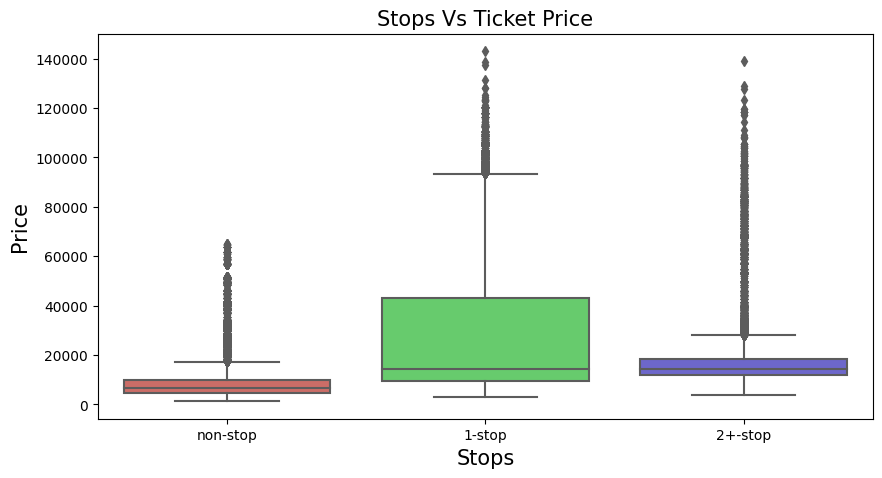

In [281]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Total_stops',y='Fare',data=df,palette='hls')
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

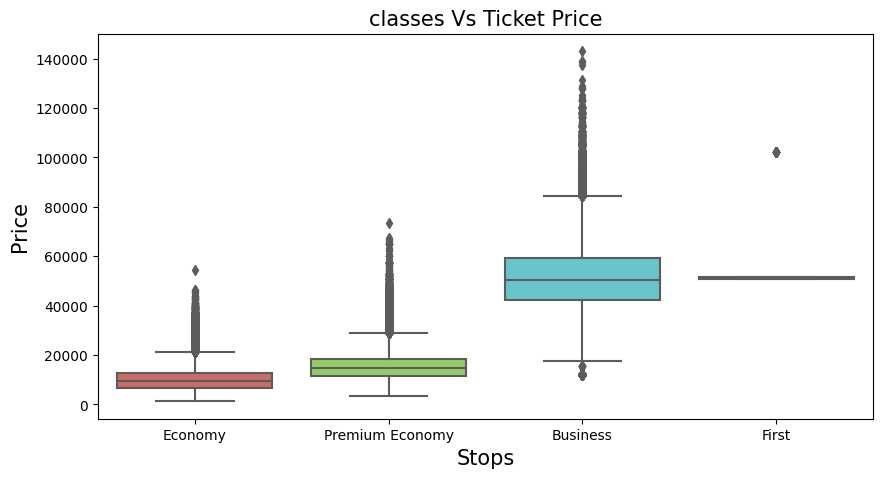

In [282]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Classes',y='Fare',data=df,palette='hls')
plt.title('classes Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

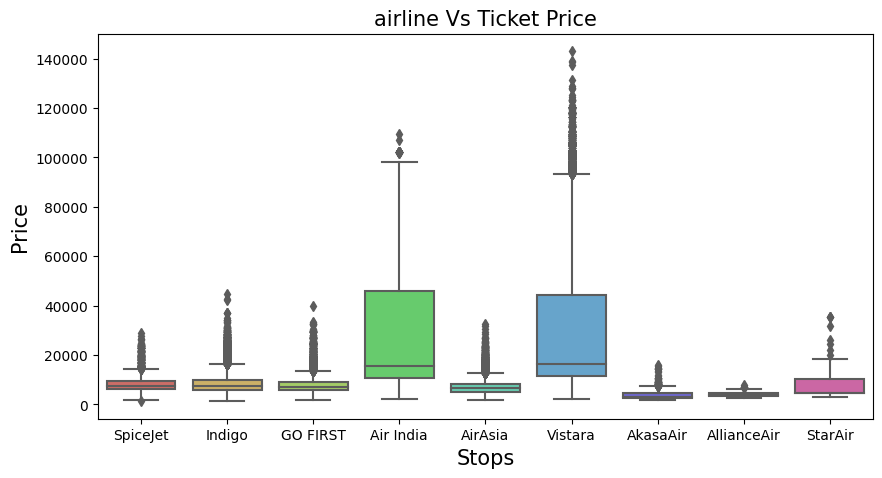

In [283]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Airline',y='Fare',data=df,palette='hls')
plt.title('airline Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

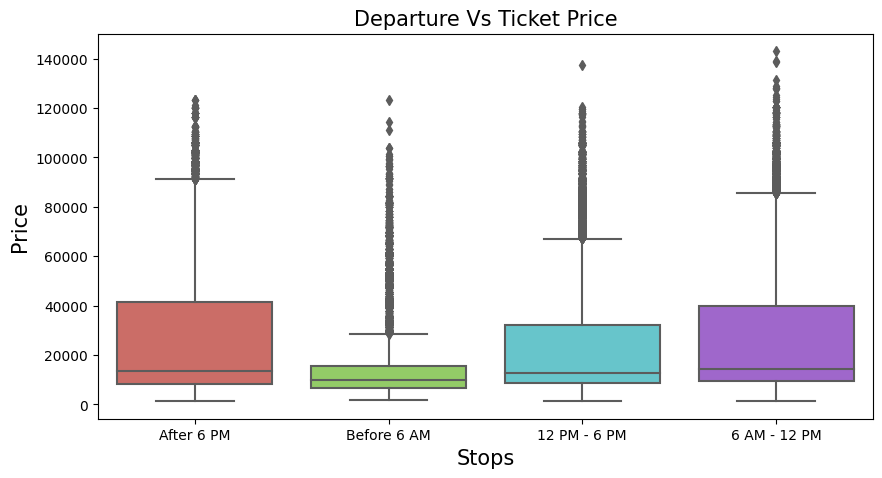

In [284]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Departure',y='Fare',data=df,palette='hls')
plt.title('Departure Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

* Departure before 6 am costs slightly less fare compared to other departure timing

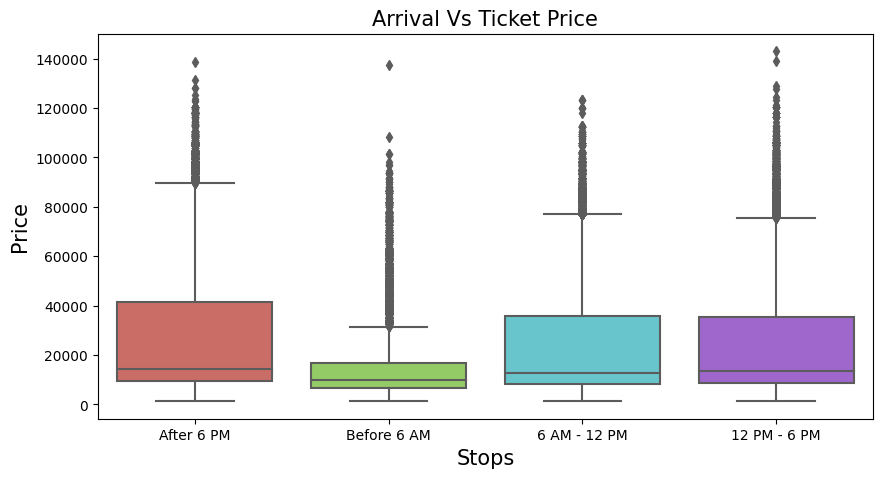

In [285]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Arrival',y='Fare',data=df,palette='hls')
plt.title('Arrival Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

* here also we can notice that before 6 am arrivals are having slightly less fare compare to others

In [286]:
df.columns
#CHECKING OUT THE COLUMN NAMES AT THIS STAGE

Index(['Date_of_journey', 'Journey_day', 'Airline', 'Flight_code', 'Classes',
       'Source', 'Departure', 'Total_stops', 'Arrival', 'Destination',
       'Duration_in_hours', 'Days_left', 'Fare'],
      dtype='object')

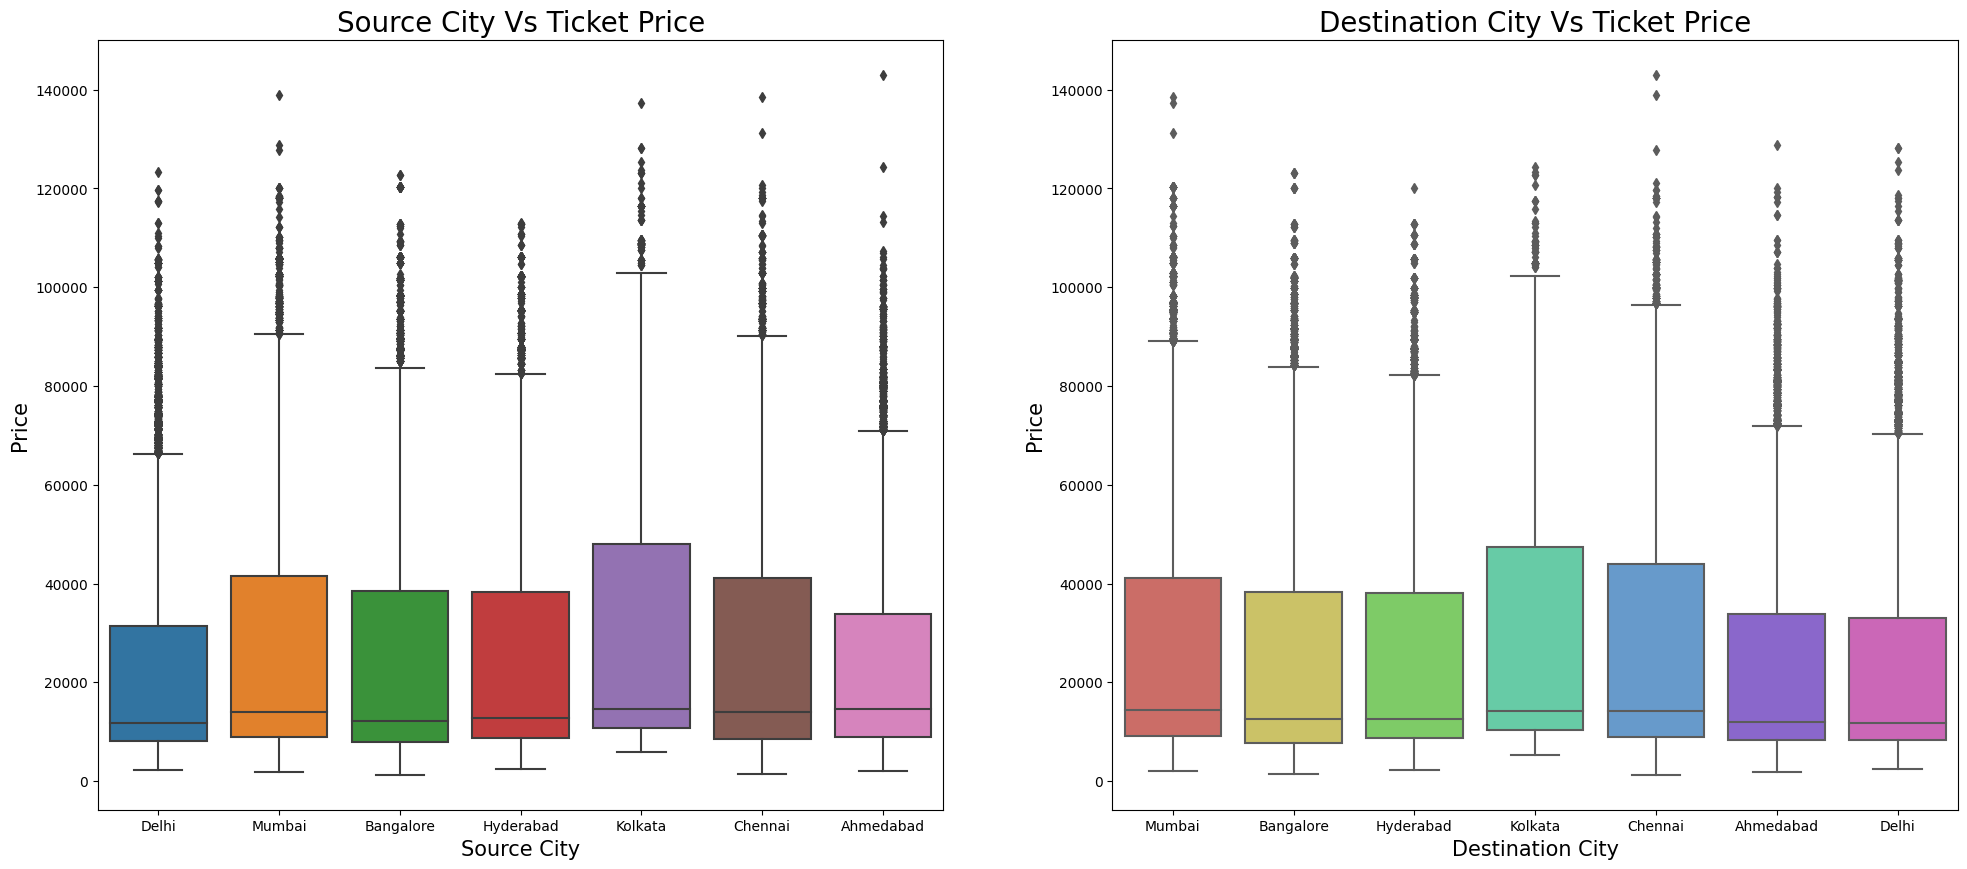

In [287]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='Source',y='Fare',data=df)
plt.title('Source City Vs Ticket Price',fontsize=20)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='Destination',y='Fare',data=df,palette='hls')
plt.title('Destination City Vs Ticket Price',fontsize=20)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

In [288]:
df.nlargest(10, 'Fare')
#CHECKING THE TOP 10 FARES FROM THE DATASET

,Date_of_journey,Journey_day,Airline,Flight_code,Classes,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
433424,2023-01-17,Tuesday,Vistara,UK-936,Business,Ahmedabad,6 AM - 12 PM,1-stop,12 PM - 6 PM,Chennai,7.9167,2,143019
141821,2023-01-29,Sunday,Vistara,UK-861,Business,Mumbai,6 AM - 12 PM,2+-stop,12 PM - 6 PM,Chennai,9.7500,14,138951
357013,2023-01-22,Sunday,Vistara,UK-836,Business,Chennai,6 AM - 12 PM,1-stop,After 6 PM,Mumbai,10.3333,7,138496
300720,2023-01-24,Tuesday,Vistara,UK-778,Business,Kolkata,12 PM - 6 PM,1-stop,Before 6 AM,Mumbai,8.9167,9,137275
357012,2023-01-22,Sunday,Vistara,UK-836,Business,Chennai,6 AM - 12 PM,1-stop,After 6 PM,Mumbai,10.6667,7,131283
151771,2023-01-16,Monday,Vistara,UK-851,Business,Mumbai,6 AM - 12 PM,2+-stop,12 PM - 6 PM,Ahmedabad,8.0000,1,128853
289425,2023-01-19,Thursday,Vistara,UK-772,Business,Kolkata,6 AM - 12 PM,1-stop,After 6 PM,Delhi,11.0833,4,128096
289426,2023-01-19,Thursday,Vistara,UK-772,Business,Kolkata,6 AM - 12 PM,1-stop,After 6 PM,Delhi,12.0000,4,128096
139124,2023-01-16,Monday,Vistara,UK-851,Business,Mumbai,6 AM - 12 PM,2+-stop,12 PM - 6 PM,Chennai,9.3333,1,127716
290372,2023-01-24,Tuesday,Vistara,UK-772,Business,Kolkata,6 AM - 12 PM,1-stop,After 6 PM,Delhi,11.0833,9,125408


In [289]:
mask = df['Classes'] == 'Economy'
economy_df = df[mask]
economy_df.nlargest(10, 'Fare')
#CHECKING THE TOP 10 FARES FROM ECONOMY CLASS

,Date_of_journey,Journey_day,Airline,Flight_code,Classes,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
152435,2023-01-20,Friday,Air India,AI-639,Economy,Mumbai,6 AM - 12 PM,2+-stop,After 6 PM,Ahmedabad,11.5000,5,54600
293977,2023-02-11,Saturday,Air India,AI-787,Economy,Kolkata,Before 6 AM,1-stop,12 PM - 6 PM,Delhi,9.3333,27,46269
151869,2023-01-17,Tuesday,Vistara,UK-851,Economy,Mumbai,6 AM - 12 PM,2+-stop,12 PM - 6 PM,Ahmedabad,8.0000,2,46192
114339,2023-01-17,Tuesday,Vistara,UK-930,Economy,Mumbai,6 AM - 12 PM,1-stop,After 6 PM,Hyderabad,15.2500,2,45980
405572,2023-01-16,Monday,Vistara,UK-966,Economy,Ahmedabad,After 6 PM,1-stop,6 AM - 12 PM,Mumbai,13.1667,1,45489
152047,2023-01-18,Wednesday,Air India,AI-639,Economy,Mumbai,6 AM - 12 PM,2+-stop,After 6 PM,Ahmedabad,11.5000,3,45434
386607,2023-02-11,Saturday,Indigo,6E-526,Economy,Chennai,Before 6 AM,1-stop,6 AM - 12 PM,Kolkata,6.1667,27,44736
73037,2023-01-16,Monday,Vistara,UK-637,Economy,Delhi,12 PM - 6 PM,2+-stop,After 6 PM,Ahmedabad,7.1667,1,43965
347716,2023-02-06,Monday,Air India,AI-549,Economy,Chennai,Before 6 AM,1-stop,12 PM - 6 PM,Delhi,9.6667,22,43915
151682,2023-01-16,Monday,Vistara,UK-851,Economy,Mumbai,6 AM - 12 PM,2+-stop,12 PM - 6 PM,Ahmedabad,8.0000,1,43882


In [290]:
df.groupby(['Flight_code','Source','Destination','Airline','Classes'],as_index=False).count().groupby(['Source','Destination'],as_index=False)['Flight_code'].count().head(10)
#TOTAL NUMBER OF FLIGHTS BETWEEN CITIES

,Source,Destination,Flight_code
0,Ahmedabad,Bangalore,85
1,Ahmedabad,Chennai,82
2,Ahmedabad,Delhi,64
3,Ahmedabad,Hyderabad,77
4,Ahmedabad,Kolkata,88
5,Ahmedabad,Mumbai,50
6,Bangalore,Ahmedabad,136
7,Bangalore,Chennai,97
8,Bangalore,Delhi,181
9,Bangalore,Hyderabad,119


In [291]:
df["Source"].unique()
#WHICH ARE THE SOURCE CITIES

array(['Delhi', 'Mumbai', 'Bangalore', 'Hyderabad', 'Kolkata', 'Chennai',
       'Ahmedabad'], dtype=object)

In [292]:
df["Destination"].unique()
#WHICH ARE THE DESTINATION CITIES

array(['Mumbai', 'Bangalore', 'Hyderabad', 'Kolkata', 'Chennai',
       'Ahmedabad', 'Delhi'], dtype=object)

In [293]:
df.groupby(['Airline','Source','Destination'],as_index=False)['Fare'].mean().head(10)
#AVERAGE PRICE OF AIR INDIA BETWEEN CITIES

,Airline,Source,Destination,Fare
0,Air India,Ahmedabad,Bangalore,30898.056017
1,Air India,Ahmedabad,Chennai,31986.554209
2,Air India,Ahmedabad,Delhi,25284.740260
3,Air India,Ahmedabad,Hyderabad,28618.727551
4,Air India,Ahmedabad,Kolkata,30114.170294
5,Air India,Ahmedabad,Mumbai,31228.560304
6,Air India,Bangalore,Ahmedabad,28063.483264
7,Air India,Bangalore,Chennai,28978.088460
8,Air India,Bangalore,Delhi,23134.751645
9,Air India,Bangalore,Hyderabad,27742.954733


In [294]:
df

,Date_of_journey,Journey_day,Airline,Flight_code,Classes,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...,...
440082,2023-03-06,Monday,Vistara,UK-966,Business,Ahmedabad,After 6 PM,1-stop,After 6 PM,Chennai,26.1667,50,60453
440083,2023-03-06,Monday,Vistara,UK-936,Business,Ahmedabad,6 AM - 12 PM,1-stop,12 PM - 6 PM,Chennai,7.9167,50,61302
440084,2023-03-06,Monday,Vistara,UK-918,Business,Ahmedabad,Before 6 AM,1-stop,12 PM - 6 PM,Chennai,11.2500,50,61302
440085,2023-03-06,Monday,Vistara,UK-946,Business,Ahmedabad,6 AM - 12 PM,1-stop,After 6 PM,Chennai,11.1667,50,65028


Dropping the date of journey column after extracting the year, day and month

dropping the journey day column because we will extract it from date and convert into numeric format

In [295]:
df['Date_of_journey'] = pd.to_datetime(df['Date_of_journey'])
#converting the date column to datetime object

# Extract features from "Date_of_journey" column
df['Year'] = df['Date_of_journey'].dt.year
df['Month'] = df['Date_of_journey'].dt.month
df['Day'] = df['Date_of_journey'].dt.day
df['Day_of_week'] = df['Date_of_journey'].dt.dayofweek

# Drop the original "Date_of_journey" column because we dont need it
df.drop('Date_of_journey', axis=1, inplace=True)

In [296]:
df.drop('Journey_day', axis=1, inplace=True)

In [297]:
df['Day_of_week'].unique()
#MAKING SURE THERE ARE 7 VALUES REPRESENTING 7 DAYS

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [298]:
df['Departure'].unique()


array(['After 6 PM', 'Before 6 AM', '12 PM - 6 PM', '6 AM - 12 PM'],
      dtype=object)

In [299]:
df

,Airline,Flight_code,Classes,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare,Year,Month,Day,Day_of_week
0,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335,2023,1,16,0
1,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899,2023,1,16,0
2,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801,2023,1,16,0
3,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794,2023,1,16,0
4,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955,2023,1,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440082,Vistara,UK-966,Business,Ahmedabad,After 6 PM,1-stop,After 6 PM,Chennai,26.1667,50,60453,2023,3,6,0
440083,Vistara,UK-936,Business,Ahmedabad,6 AM - 12 PM,1-stop,12 PM - 6 PM,Chennai,7.9167,50,61302,2023,3,6,0
440084,Vistara,UK-918,Business,Ahmedabad,Before 6 AM,1-stop,12 PM - 6 PM,Chennai,11.2500,50,61302,2023,3,6,0
440085,Vistara,UK-946,Business,Ahmedabad,6 AM - 12 PM,1-stop,After 6 PM,Chennai,11.1667,50,65028,2023,3,6,0


In [300]:
#CHECKING HOW MANY UNIQUE VALUES IN FLIGHT CODE COLUMN
len(df['Flight_code'].unique())

1405

In [301]:
#NOW WE NEED TO CHECK IF THE FLIGHT CODE REALLY AFFECTS THE FLIGHT PRICE
flightcode_mean_fare = df.groupby(['Flight_code','Airline'])['Fare'].mean()
flightcode_mean_fare


Flight_code  Airline
6E-107       Indigo      6515.250000
6E-108       Indigo     14188.785714
6E-109       Indigo      7971.344828
6E-113       Indigo      9354.326087
6E-114       Indigo     12049.712121
                            ...     
UK-993       Vistara    27430.669927
UK-994       Vistara    31319.731519
UK-995       Vistara    27721.985761
UK-996       Vistara    35933.871275
UK-997       Vistara     8130.379310
Name: Fare, Length: 1405, dtype: float64

In [302]:
import scipy.stats as stats

# Assume flightcode_mean_fare is the pandas Series with the mean fare for each flight code

# Perform Shapiro-Wilk normality test
shapiro_results = stats.shapiro(flightcode_mean_fare)

# Print the test statistic and p-value
print(f"Shapiro-Wilk test statistic: {shapiro_results.statistic:.3f}")
print(f"Shapiro-Wilk p-value: {shapiro_results.pvalue:.3f}")

Shapiro-Wilk test statistic: 0.777
Shapiro-Wilk p-value: 0.000


Flight code affects the fare as we can see . but its dependency is almost same as the airline . so we are keeping the airline column and dropping the

flight_code to reduce the dimentionality of the dataframe

In [303]:
#DROPPING THE FLIGHT_CODE COLUMN 
df.drop('Flight_code', axis=1, inplace=True)

In [304]:
df

,Airline,Classes,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare,Year,Month,Day,Day_of_week
0,SpiceJet,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335,2023,1,16,0
1,Indigo,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899,2023,1,16,0
2,GO FIRST,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801,2023,1,16,0
3,SpiceJet,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794,2023,1,16,0
4,Air India,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955,2023,1,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440082,Vistara,Business,Ahmedabad,After 6 PM,1-stop,After 6 PM,Chennai,26.1667,50,60453,2023,3,6,0
440083,Vistara,Business,Ahmedabad,6 AM - 12 PM,1-stop,12 PM - 6 PM,Chennai,7.9167,50,61302,2023,3,6,0
440084,Vistara,Business,Ahmedabad,Before 6 AM,1-stop,12 PM - 6 PM,Chennai,11.2500,50,61302,2023,3,6,0
440085,Vistara,Business,Ahmedabad,6 AM - 12 PM,1-stop,After 6 PM,Chennai,11.1667,50,65028,2023,3,6,0


In [305]:
df.columns

Index(['Airline', 'Classes', 'Source', 'Departure', 'Total_stops', 'Arrival',
       'Destination', 'Duration_in_hours', 'Days_left', 'Fare', 'Year',
       'Month', 'Day', 'Day_of_week'],
      dtype='object')

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440087 entries, 0 to 440086
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Airline            440087 non-null  object 
 1   Classes            440087 non-null  object 
 2   Source             440087 non-null  object 
 3   Departure          440087 non-null  object 
 4   Total_stops        440087 non-null  object 
 5   Arrival            440087 non-null  object 
 6   Destination        440087 non-null  object 
 7   Duration_in_hours  440087 non-null  float64
 8   Days_left          440087 non-null  int64  
 9   Fare               440087 non-null  int64  
 10  Year               440087 non-null  int64  
 11  Month              440087 non-null  int64  
 12  Day                440087 non-null  int64  
 13  Day_of_week        440087 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 47.0+ MB


In [307]:
print("classes         : ",df['Classes'].unique())
print("--"*60)
print("Airlines        : ",df['Airline'].unique())
print("--"*60)
print("Source airports : ",df['Source'].unique())
print("--"*60)
print("Departure time  : ",df['Departure'].unique())
print("--"*60)
print("Total stops     : ",df['Total_stops'].unique())
print("--"*60)
print("Arrival time    : ",df['Arrival'].unique())
print("--"*60)
print("Destin airport  : ",df['Destination'].unique())
print("--"*60)

classes         :  ['Economy' 'Premium Economy' 'Business' 'First']
------------------------------------------------------------------------------------------------------------------------
Airlines        :  ['SpiceJet' 'Indigo' 'GO FIRST' 'Air India' 'AirAsia' 'Vistara' 'AkasaAir'
 'AllianceAir' 'StarAir']
------------------------------------------------------------------------------------------------------------------------
Source airports :  ['Delhi' 'Mumbai' 'Bangalore' 'Hyderabad' 'Kolkata' 'Chennai' 'Ahmedabad']
------------------------------------------------------------------------------------------------------------------------
Departure time  :  ['After 6 PM' 'Before 6 AM' '12 PM - 6 PM' '6 AM - 12 PM']
------------------------------------------------------------------------------------------------------------------------
Total stops     :  ['non-stop' '1-stop' '2+-stop']
---------------------------------------------------------------------------------------------------------

In [308]:
df

,Airline,Classes,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare,Year,Month,Day,Day_of_week
0,SpiceJet,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335,2023,1,16,0
1,Indigo,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899,2023,1,16,0
2,GO FIRST,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801,2023,1,16,0
3,SpiceJet,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794,2023,1,16,0
4,Air India,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955,2023,1,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440082,Vistara,Business,Ahmedabad,After 6 PM,1-stop,After 6 PM,Chennai,26.1667,50,60453,2023,3,6,0
440083,Vistara,Business,Ahmedabad,6 AM - 12 PM,1-stop,12 PM - 6 PM,Chennai,7.9167,50,61302,2023,3,6,0
440084,Vistara,Business,Ahmedabad,Before 6 AM,1-stop,12 PM - 6 PM,Chennai,11.2500,50,61302,2023,3,6,0
440085,Vistara,Business,Ahmedabad,6 AM - 12 PM,1-stop,After 6 PM,Chennai,11.1667,50,65028,2023,3,6,0


In [309]:
#SPLITTING THE FEATURES INTO TARGET VARIABLE AND FEATURES
X=df.drop(['Fare'],axis=1)
y=df['Fare']

In [310]:
X
#FEATURES

,Airline,Classes,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Year,Month,Day,Day_of_week
0,SpiceJet,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,2023,1,16,0
1,Indigo,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,2023,1,16,0
2,GO FIRST,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,2023,1,16,0
3,SpiceJet,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,2023,1,16,0
4,Air India,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,2023,1,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
440082,Vistara,Business,Ahmedabad,After 6 PM,1-stop,After 6 PM,Chennai,26.1667,50,2023,3,6,0
440083,Vistara,Business,Ahmedabad,6 AM - 12 PM,1-stop,12 PM - 6 PM,Chennai,7.9167,50,2023,3,6,0
440084,Vistara,Business,Ahmedabad,Before 6 AM,1-stop,12 PM - 6 PM,Chennai,11.2500,50,2023,3,6,0
440085,Vistara,Business,Ahmedabad,6 AM - 12 PM,1-stop,After 6 PM,Chennai,11.1667,50,2023,3,6,0


In [311]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440087 entries, 0 to 440086
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Airline            440087 non-null  object 
 1   Classes            440087 non-null  object 
 2   Source             440087 non-null  object 
 3   Departure          440087 non-null  object 
 4   Total_stops        440087 non-null  object 
 5   Arrival            440087 non-null  object 
 6   Destination        440087 non-null  object 
 7   Duration_in_hours  440087 non-null  float64
 8   Days_left          440087 non-null  int64  
 9   Year               440087 non-null  int64  
 10  Month              440087 non-null  int64  
 11  Day                440087 non-null  int64  
 12  Day_of_week        440087 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 43.6+ MB


In [312]:
y
#TARGET VARIABLE 'Fare'

0          5335
1          5899
2          5801
3          5794
4          5955
          ...  
440082    60453
440083    61302
440084    61302
440085    65028
440086    65028
Name: Fare, Length: 440087, dtype: int64

# split the data into train test split

In [313]:
# Splitting the Data into Training set and Testing Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

print("shape of x_train  : ",x_train.shape)
print("shape of x_test   : ",x_test.shape)
print("shape of y_train  : ",y_train.shape)
print("shape of y_test   : ",y_test.shape)

shape of x_train  :  (308060, 13)
shape of x_test   :  (132027, 13)
shape of y_train  :  (308060,)
shape of y_test   :  (132027,)


# CREATING THE PIPELINE FOR PREPROCESSING AND TRAINING THE DATA

In [317]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# define the categorical and numerical features
categorical_features = ['Airline', 'Source', 'Departure', 'Classes','Total_stops', 'Arrival', 'Destination']
numerical_features = ['Duration_in_hours', 'Days_left', 'Year', 'Month', 'Day', 'Day_of_week']

# create the transformer for categorical features
cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


# create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_transformer, categorical_features)    ])


# transform the training data
x_train_processed = preprocessor.fit_transform(x_train)

# transform the test data
x_test_processed = preprocessor.transform(x_test)

# save the preprocessor as a pickle object
import pickle
with open('preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)


In [318]:
from sklearn.ensemble import RandomForestRegressor

# train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train_processed, y_train)

# predict on test data
y_pred = rf.predict(x_test_processed)

# evaluate the model using mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 41636963.86023311


In [319]:
import pickle

# save the model to a file
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf, f)


# CHECKING THE PERFOMANCE OF THE MODEL

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

# load the model from the file
with open('model/random_forest_model.pkl', 'rb') as f:
    model = pickle.load(f)

# make predictions on the test data
y_pred = model.predict(x_test_processed)

# calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

# TESTING THE MODEL WITH A NEW DATAFRAME

In [8]:
# Load the preprocessing pipeline object
import pandas as pd
import pickle
with open('model/preprocessor.pkl', 'rb') as file:
    preprocessing_pipeline = pickle.load(file)

# Preprocess the new dataframe
new_data = pd.DataFrame([{'Airline': 'Vistara', 
                        'Classes': 'Business', 
                        'Source': 'Delhi', 
                        'Departure': 'After 6 PM',
                        'Total_stops': '2+-stop',
                        'Arrival': 'After 6 AM',
                        'Destination': 'Mumbai',
                        'Duration_in_hours': 2.333,
                        'Days_left': 1, 
                        'Year': 2023,
                        'Month': 1,
                        'Day': 16,
                        'Day_of_week': 0}])

preprocessed_new_data = preprocessing_pipeline.transform(new_data)

# Make predictions using the trained model
predictions = model.predict(preprocessed_new_data)
print("predicted price is : ",predictions)


predicted price is :  [46849.74161186]


# we have saved the preprocessor and model with an R-square value of 0.90 !